# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [2]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')


In [114]:
import matplotlib.pyplot as plt
import numpy as np

In [54]:
df

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0
5,99.2,M,83.0
6,98.0,M,71.0
7,98.8,M,78.0
8,98.4,F,84.0
9,98.6,F,86.0


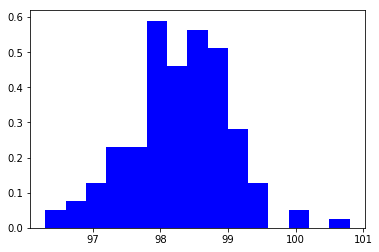

In [74]:
temp = df['temperature']
plt.hist(temp, bins=15, normed=True, color='blue')
plt.show()

In [66]:
np.mean(temp)

98.24923076923078

1.Is the distribution of body temperatures normal?

Given that the mean is 98.249 and the graph visually skewed, the distribution is not normal.

2.Is the sample size large? Are the observations independent?

a sample of 130 is relatively small. The observations are independent.

In [159]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y


In [172]:
def draw_bs_reps(data, func, size, sample_len):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = func(np.random.choice(data, sample_len))
                            
    return bs_replicates

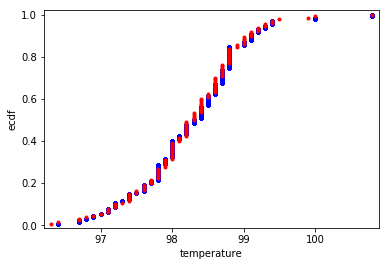

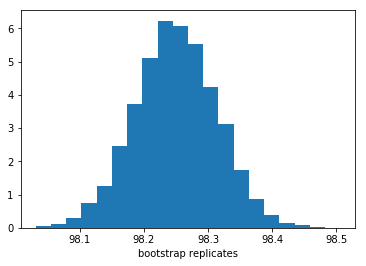

In [174]:
bs_replicates = draw_bs_reps(temp, np.mean, 10000, len(temp))

for i in range(100):
    """Create a bootstrap sample from temperature and plot each sample ECDF"""
    bs_sample= np.random.choice(temp, size = len(temp))
    x, y = ecdf(bs)
    _ =plt.plot(x, y, marker='.', linestyle ='none', alpha=.2, color='blue')
    

#overlay temperature ECDF in red
x, y = ecdf(temp)
_=plt.plot(x, y, '.', color='red')

_=plt.margins(.02)
_=plt.xlabel('temperature')
_=plt.ylabel('ecdf')
_=plt.show()

np.mean(bs_replicates)
plt.hist(bs_replicates, bins=20, normed=True)
plt.xlabel('bootstrap replicates')
plt.show()


3.. Is the true population mean really 98.6 degrees F?

-First, try a bootstrap hypothesis test.
    
    The bootstrap test indicates the mean is closer to 98.25 degrees F.
    
-Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
      
    We will use a one-sample test since we are testing to see if our sample has the same mean as Wunderlich's 98.6         degrees F.
      
-In this situation, is it appropriate to use the  t or  z statistic?
    
    We should use the z statistic here since we have a decent size sample of over 30.

-Now try using the other test. How is the result be different? Why?
    
    As we can see below with the t test we get a p value of 2.41, where with the z test we get .68. The differance is probably because of the sample size.
    

In [123]:

def get_z(data_array, sample):
    """returns z score for given array and sample"""
    return (sample - np.mean(data_array))/float(np.std(data_array))

In [182]:
import scipy.stats as st

# do we use the bs_replicates as the data_array here? or the orignial temp with 130 values??
z = get_z(bs_replicates, 98.6)
print('z score is:', z)

print('p is :' ,st.norm.cdf(z))


z score is: 5.50823396905
p is : 0.999999981877


In [181]:
# conduct t test
from scipy.stats import ttest_1samp

t , p = ttest_1samp(temp, 98.6)
print('t score is:', t, 'with a p value of:', p)


t score is: -5.45482329236 with a p value of: 2.41063204156e-07


4.. Draw a small sample of size 10 from the data and repeat both frequentist tests.

-Which one is the correct one to use? 
    
    the t score, since the sample size is so small and the standard deviation is unknown.

-What do you notice? What does this tell you about the difference in application of the  t and  z statistic?
    
    depending on the sample size is under 30 and if we have the population std, we must choose either t or z statistics to use.

In [235]:
bs_ten = draw_bs_reps(temp, np.mean, 10000, 10)
z_ten = get_z(bs_ten, 98.6)
t_ten, p_ten = ttest_1samp(bs_ten, 98.6)

print('z score from a sample size of 10 is:', z_ten, 'while having a p value of:', st.norm.cdf(z_ten))
print('t score from a sample size of 10 is:', t_ten, 'while having a p value of:', p_ten)


z score from a sample size of 10 is: 1.52147157846 while having a p value of: 0.935929230821
t score from a sample size of 10 is: -152.139550298 while having a p value of: 0.0


5..At what temperature should we consider someone's temperature to be "abnormal"?
    
-As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.

-Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.

6..Is there a significant difference between males and females in normal temperature?
    
    A quick look at the mean of male vs female temperature's indicate males may have higher average temperatures.
    
What testing approach did you use and why?

    I used a boostrap frequentist approach and had similiar results to looking at the mean of the original sample.
    
Write a story with your conclusion in the context of the original problem.

    

In [234]:
temp_m = df.temperature[df.gender == 'M']
temp_f = df.temperature[df.gender == 'F']
print('male mean temp:' ,np.mean(temp_m))
print('female mean temp:' , np.mean(temp_f))


male mean temp: 98.1046153846154
female mean temp: 98.39384615384613


In [238]:
bs_male = draw_bs_reps(temp_m, np.mean, 10000, len(temp_m))
print('male mean body temp is:' , np.mean(bs_male))

bs_female = draw_bs_reps(temp_f, np.mean, 10000, len(temp_f))
print('male mean body temp is:' , np.mean(bs_female))

male mean body temp is: 98.1055529231
male mean body temp is: 98.3937929231
